## Homework 2

## Part 3- Python tasks

### 1. Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file, and paste a screenshot of the HTML file here (10 points).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from ydata_profiling import ProfileReport
import warnings

warnings.filterwarnings("ignore")

In [2]:
red_df= pd.read_csv('red_wine.csv')
red_df

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low
...,...,...,...,...
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low


In [3]:
profile = ProfileReport(red_df, title="Profiling Report")

In [4]:
profile.to_widgets()
profile.to_notebook_iframe()
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

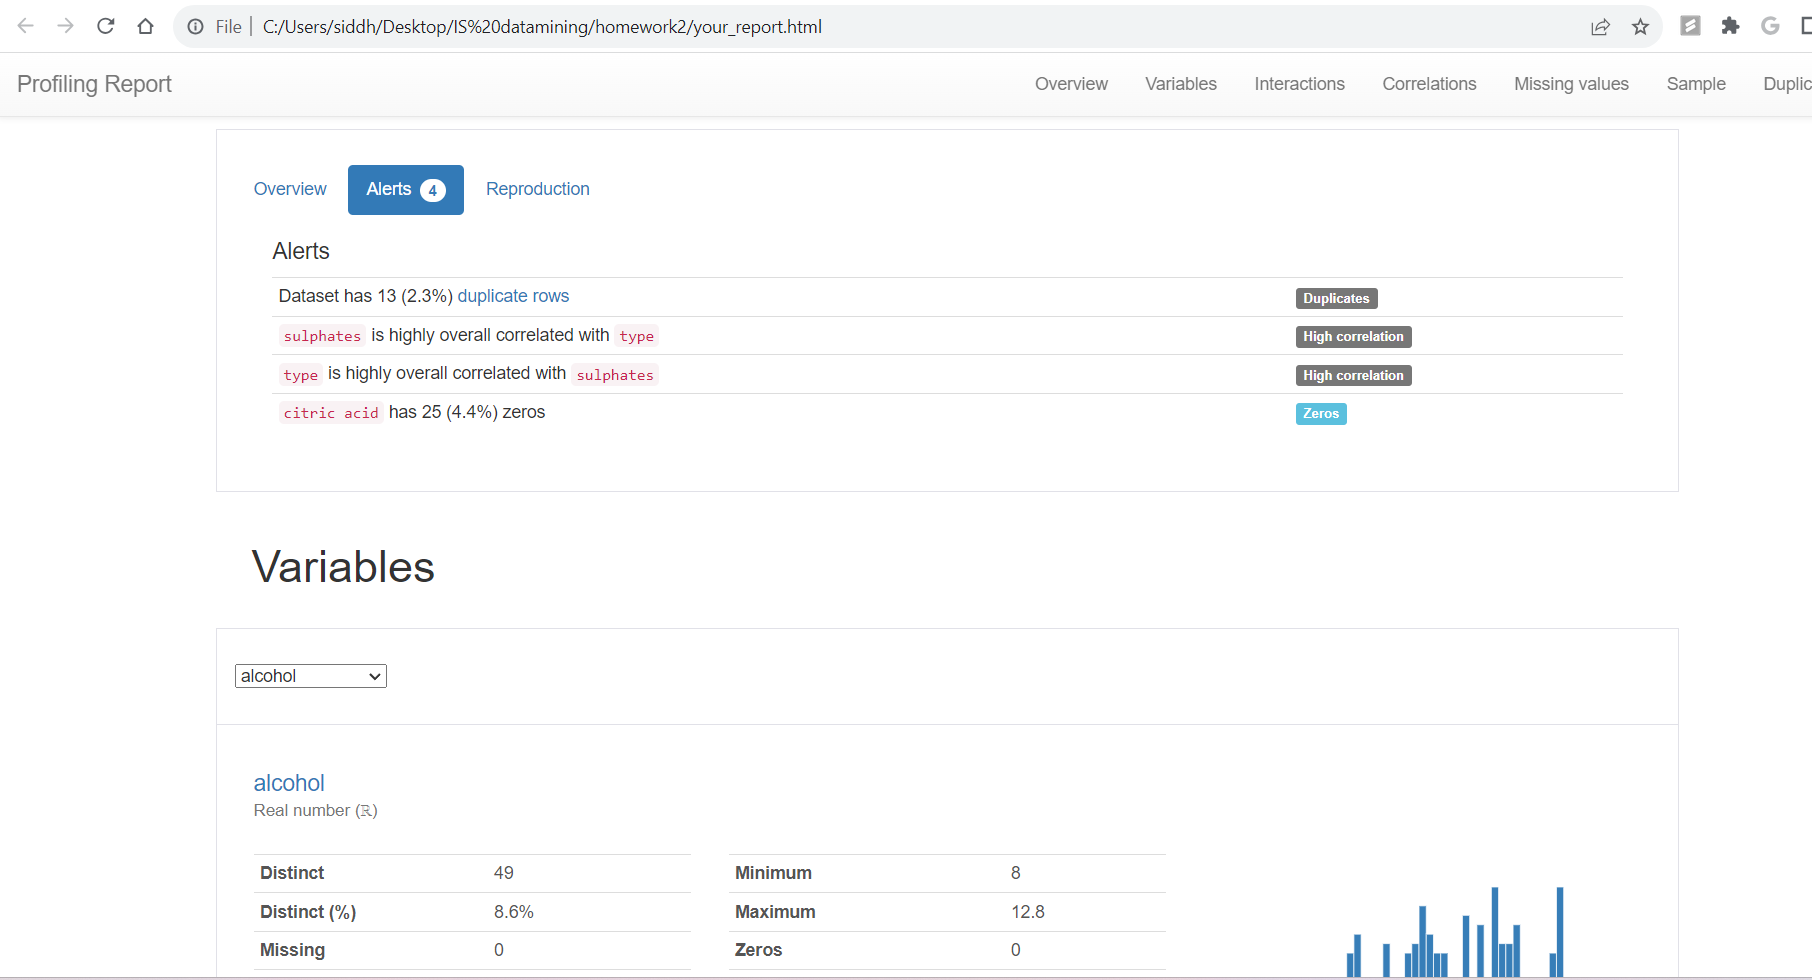

In [5]:
from IPython.display import Image
Image(filename='hw2.png')

### 2. Fit a model using each of the following methods and report the performance metrics of 10-fold cross-validation using red-wine.csv as the training set

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Define your features and target variable
X = red_df.drop('type', axis=1)
y = red_df['type']

# Initialize models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to calculate AUC and accuracy using cross-validation
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return auc_scores, accuracy_scores

# Create a table to store the results
results = pd.DataFrame(columns=['Model', 'AUC', 'Accuracy'])

# Evaluate each model and store the results in the table
for model_name, model in models.items():
    auc_scores, accuracy_scores = evaluate_model(model, X, y)
    results = results.append({
        'Model': model_name,
        'AUC': auc_scores.mean(),
        'Accuracy': accuracy_scores.mean()
    }, ignore_index=True)

results

,Model,AUC,Accuracy
0,Baseline,0.500000,0.528887
1,Logistic Regression,0.875819,0.784392
2,Naive Bayes,0.893291,0.824773
3,Decision Tree,0.814674,0.812432
4,SVM,0.855024,0.535844
5,Random Forest,0.922834,0.843890


### 3. Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
red_df['type'] = le.fit_transform(red_df['type'])

# Split the data into features (X) and the target variable (y)
X = red_df.drop('type', axis=1)
y = red_df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the probabilities for the positive class (class 'high' in your case)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [8]:
roc_auc

0.9033575317604357

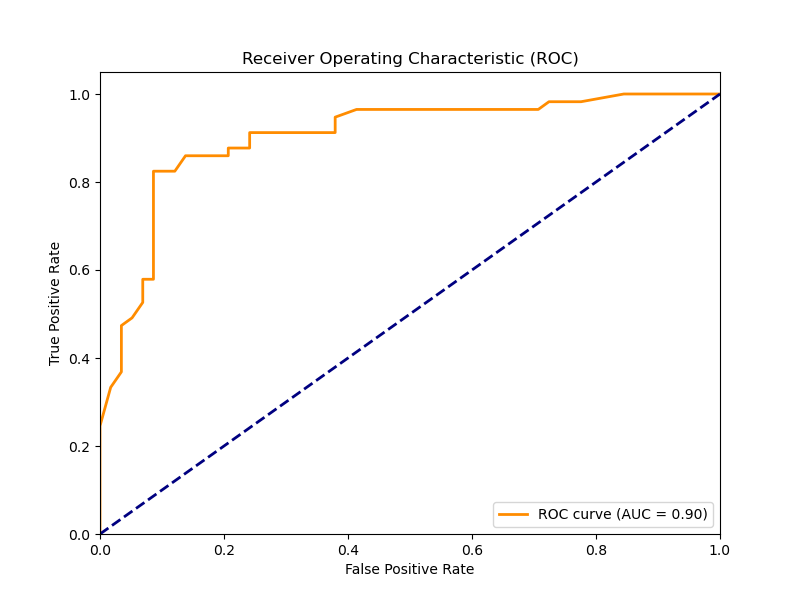

In [9]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
# Save the ROC curve as an image
plt.savefig('roc_curve.png')
# Show the plot (optional)
plt.show()
Image(filename='roc_curve.png')

### 4: Using the best model obtained above in Q2 (according to AUC), running the model on white-wine.csv, and reporting the AUC score, comment on the performance. (5 points)

In [10]:
white_df = pd.read_csv('white_wine.csv')

X_w = white_df.drop('type', axis=1)
y_w = white_df['type']

clf.fit(X, y)

# Predict probabilities for the positive class (type 'high' or class 1)
y_scores_white = clf.predict_proba(X_w)[:, 1]

# Calculate the AUC score for the white-wine dataset
auc_score_white = roc_auc_score(y_w, y_scores_white)

# Report the AUC score
print("AUC Score for White Wine Dataset:", auc_score_white)

AUC Score for White Wine Dataset: 0.973963355834137


High AUC indicates good model performance.

### 5. Suppose all the models have comparable performance. Which model would you prefer if the wine-tasting experts would like to gain some insights into the model? Note: there could be multiple model types fitting this criterion. (5 points)

* Logistic Regression and Decision Trees are often a good starting point due to their simplicity and interpretability. 
* However, Random Forest and Naive Bayes can also offer insights into feature importance.